In [108]:
library('plm')

In [109]:
df_ihh  <-  read.csv(file="raw_full.csv", header=TRUE, sep=",")

In [110]:
df_ihh[is.na(df_ihh)] <- 0

In [111]:
# df_ihh$merge_index  <- NULL

In [112]:
df_ihh[df_ihh$otrasl == 'IT', c('IHH', 'MA')] 

IHH       MA       
1   86.41889  34351.51
19  91.33739  51898.21
37  98.72069 109740.54
55 110.62707 307476.86
72  13.92440  46197.60

In [113]:
df_ihh$value_inout  <-  NULL 
df_ihh$value_in  <-  NULL 
df_ihh$value_outin  <-  NULL 

In [114]:
df_ihh = pdata.frame(df_ihh, index = c('otrasl','year'))

In [115]:
df_ihh$real_prices[df_ihh$real_prices == 0] <- NA

In [116]:
df_ihh['log_ihh'] = log(df_ihh$IHH)
# df_ihh['log_ma'] = log(df_ihh$MA)

In [117]:
df_ihh['ma_lag'] = lag(df_ihh$MA, 1)

In [118]:
# df_lag = lag(df_ihh$MA, 1)

In [119]:
df_ihh_part = df_ihh[df_ihh$otrasl != 'IT', ] 

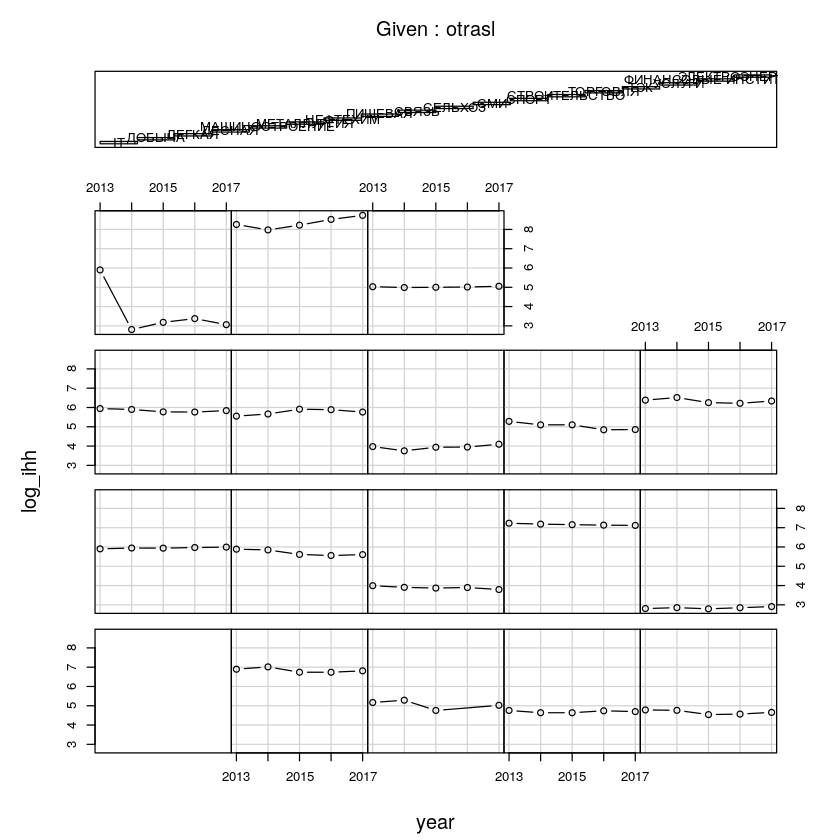

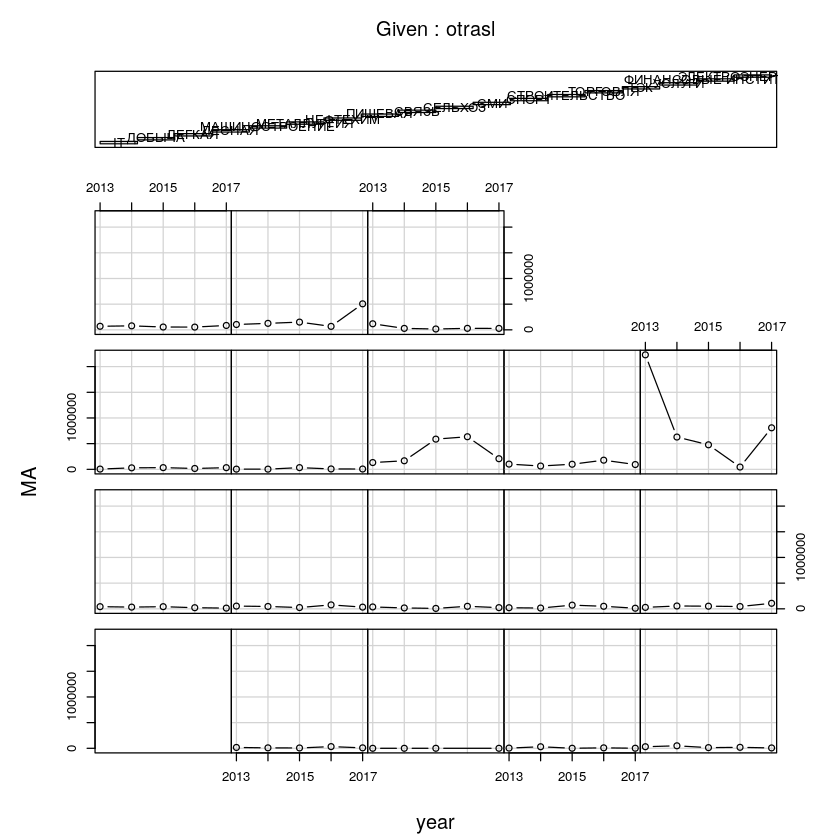

In [120]:
coplot(log_ihh ~ year|otrasl, type="b", data=df_ihh_part)
coplot(MA ~ year|otrasl, type="b", data=df_ihh_part)

In [121]:
library(gplots)

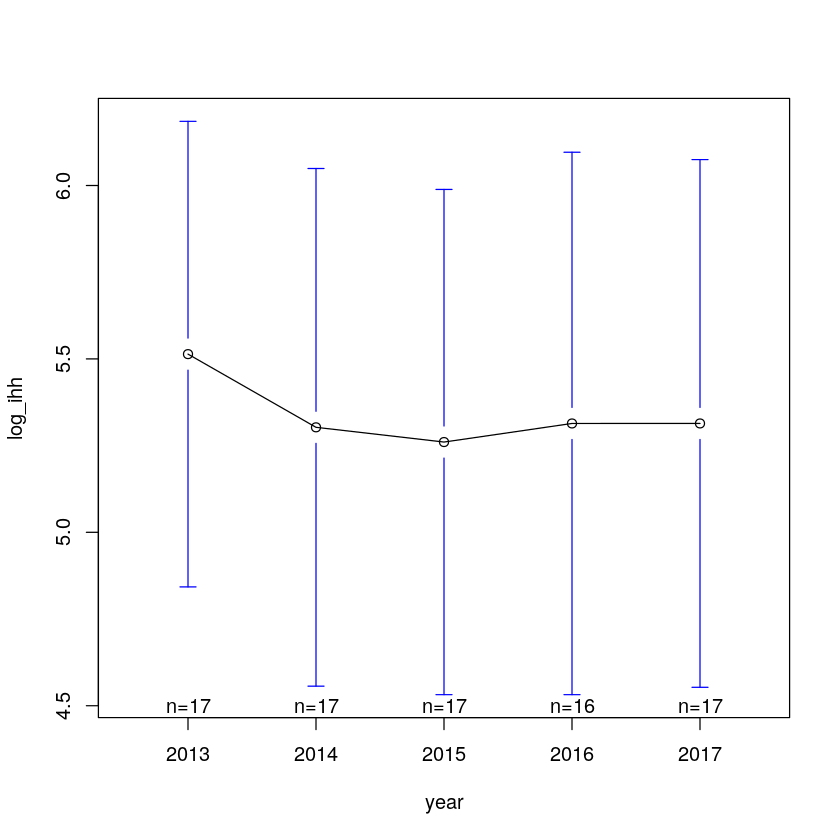

In [122]:
plotmeans(log_ihh ~ year, data = df_ihh_part)
# plotmeans(IHH ~ otrasl, data = df_ihh)

In [127]:
ols <-lm(log_ihh~MA+ma_lag+log(real_prices)+real_gdp_change+type_1+type_2+type_3, data = df_ihh_part)
summary(ols)


Call:
lm(formula = log_ihh ~ MA + ma_lag + log(real_prices) + real_gdp_change + 
    type_1 + type_2 + type_3, data = df_ihh_part)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0916 -0.5489 -0.0632  0.1853  3.6336 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)       5.271e+00  1.696e+00   3.108  0.00291 **
MA                7.872e-07  1.607e-06   0.490  0.62602   
ma_lag           -2.601e-07  7.298e-07  -0.356  0.72283   
log(real_prices) -3.752e-02  1.661e-01  -0.226  0.82214   
real_gdp_change   1.880e-05  1.430e-04   0.132  0.89583   
type_1           -5.762e-02  4.762e-01  -0.121  0.90411   
type_2            8.860e-01  4.609e-01   1.922  0.05947 . 
type_3            1.498e+00  6.173e-01   2.426  0.01839 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.389 on 58 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.1597,	Adjusted R-squared:  0.05827

In [128]:
library(ggplot2)

In [129]:
dim(df_ihh)

[1] 89 13

In [131]:
fixed.dum <-lm(log_ihh~MA+ma_lag+log(real_prices)+real_gdp_change+type_1+type_2+type_3 + factor(otrasl) - 1, data = df_ihh_part)
summary(fixed.dum)


Call:
lm(formula = log_ihh ~ MA + ma_lag + log(real_prices) + real_gdp_change + 
    type_1 + type_2 + type_3 + factor(otrasl) - 1, data = df_ihh_part)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35877 -0.04232 -0.00263  0.03809  0.26526 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
MA                                  3.986e-07  2.125e-07   1.876   0.0676 .  
ma_lag                              1.143e-07  8.145e-08   1.403   0.1680    
log(real_prices)                   -2.357e-02  2.960e-02  -0.796   0.4304    
real_gdp_change                     1.400e-05  1.482e-05   0.944   0.3503    
type_1                              1.329e-01  1.418e-01   0.937   0.3540    
type_2                             -2.504e-01  2.331e-01  -1.074   0.2888    
type_3                             -2.436e-01  1.619e-01  -1.505   0.1398    
factor(otrasl)ДОБЫЧА                7.216e+00  2.997e-01  24.078  < 2e-16 ***
factor(otrasl)ЛЕГКАЯ      

In [97]:
library(car)  

In [98]:
# yhat <- fixed.dum$fitted
# scatterplot(yhat ~ df_ihh_omit$log_ma | df_ihh_omit$otrasl,  xlab ="x1", ylab ="yhat", boxplots = FALSE,smooth = FALSE)
# abline(lm(df_ihh_omit$log_ihh~df_ihh_omit$log_ma), lwd=3, col="red")

In [135]:
fixed <- plm(log_ihh~MA+ma_lag+log(real_prices)+ real_gdp_change+type_1+type_2+type_3, data = df_ihh_part, model="within")
summary(fixed)

Oneway (individual) effect Within Model

Call:
plm(formula = log_ihh ~ MA + ma_lag + log(real_prices) + real_gdp_change + 
    type_1 + type_2 + type_3, data = df_ihh_part, model = "within")

Unbalanced Panel: n = 17, T = 2-4, N = 66

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.3587701 -0.0423188 -0.0026295  0.0380885  0.2652568 

Coefficients:
                    Estimate  Std. Error t-value Pr(>|t|)  
MA                3.9857e-07  2.1247e-07  1.8759  0.06763 .
ma_lag            1.1427e-07  8.1454e-08  1.4029  0.16801  
log(real_prices) -2.3571e-02  2.9603e-02 -0.7963  0.43036  
real_gdp_change   1.3997e-05  1.4820e-05  0.9445  0.35033  
type_1            1.3287e-01  1.4178e-01  0.9372  0.35402  
type_2           -2.5045e-01  2.3313e-01 -1.0743  0.28882  
type_3           -2.4361e-01  1.6188e-01 -1.5049  0.13984  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    1.0267
Residual Sum of Squares: 0.82224
R-Squared:    

In [136]:
fixef(fixed)

ДОБЫЧА               ЛЕГКАЯ               ЛЕСНАЯ 
            7.215660             5.036326             4.733575 
      МАШИНОСТРОЕНИЕ          МЕТАЛЛУРГИЯ             НЕФТЕХИМ 
            4.779719             6.430546             6.128153 
             ПИЩЕВАЯ                СВЯЗЬ              СЕЛЬХОЗ 
            4.083375             7.365727             3.077026 
                 СМИ                СПОРТ        СТРОИТЕЛЬСТВО 
            6.291104             6.265240             4.027533 
            ТОРГОВЛЯ                  ТЭК               УСЛУГИ 
            5.054646             6.576018             3.331612 
ФИНАНСОВЫЕ ИНСТИТУТЫ    ЭЛЕКТРОЭНЕРГЕТИКА 
            8.541294             5.099530

In [137]:
pFtest(fixed, ols)


	F test for individual effects

data:  log_ihh ~ MA + ma_lag + log(real_prices) + real_gdp_change +  ...
F = 354.5, df1 = 16, df2 = 42, p-value < 2.2e-16
alternative hypothesis: significant effects


p-value < 0.05 выбираем fe model 

In [138]:
random <- plm(log_ihh~MA+ma_lag+log(real_prices)+real_gdp_change+type_1+type_2+type_3, data = df_ihh_part, model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = log_ihh ~ MA + ma_lag + log(real_prices) + real_gdp_change + 
    type_1 + type_2 + type_3, data = df_ihh_part, model = "random")

Unbalanced Panel: n = 17, T = 2-4, N = 66

Effects:
                  var std.dev share
idiosyncratic 0.01958 0.13992 0.008
individual    2.49978 1.58107 0.992
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9375  0.9558  0.9558  0.9552  0.9558  0.9558 

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.39859 -0.07153  0.01172  0.00036  0.06171  0.39718 

Coefficients:
                    Estimate  Std. Error z-value Pr(>|z|)    
(Intercept)       5.5219e+00  4.7260e-01 11.6841   <2e-16 ***
MA                4.0511e-07  2.0866e-07  1.9415   0.0522 .  
ma_lag            1.1506e-07  8.0049e-08  1.4374   0.1506    
log(real_prices) -2.4532e-02  2.8970e-02 -0.8468   0.3971    
real_gdp_change   1.4961e-05  1.4557e-05  1.0277   0.3

In [103]:
phtest(fixed, random)


	Hausman Test

data:  log_ihh ~ MA + ma_lag + log(real_prices) + real_gdp_change +  ...
chisq = 150.84, df = 5, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent


p-value < 0.5 используем  FE модель

In [139]:
fixed.time <- plm(log_ihh~MA+ma_lag+log(real_prices)+real_gdp_change+type_1+type_2+type_3 + factor(year), data=df_ihh_part, model="within")
summary(fixed.time)

Oneway (individual) effect Within Model

Call:
plm(formula = log_ihh ~ MA + ma_lag + log(real_prices) + real_gdp_change + 
    type_1 + type_2 + type_3 + factor(year), data = df_ihh_part, 
    model = "within")

Unbalanced Panel: n = 17, T = 2-4, N = 66

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.3452714 -0.0421442 -0.0032536  0.0441934  0.2668978 

Coefficients: (1 dropped because of singularities)
                    Estimate  Std. Error t-value Pr(>|t|)  
MA                3.9865e-07  2.2383e-07  1.7810   0.0825 .
ma_lag            1.2001e-07  8.4876e-08  1.4140   0.1651  
log(real_prices) -2.3225e-02  3.0728e-02 -0.7558   0.4542  
real_gdp_change   2.8379e-05  6.7267e-05  0.4219   0.6754  
type_1            1.4802e-01  1.4767e-01  1.0024   0.3222  
type_2           -2.7118e-01  2.4118e-01 -1.1244   0.2676  
type_3           -2.6155e-01  1.7100e-01 -1.5295   0.1340  
factor(year)2015  4.8158e-02  1.9295e-01  0.2496   0.8042  
factor(year)2016  2.6769e-02  

In [140]:
pFtest(fixed.time, fixed)


	F test for individual effects

data:  log_ihh ~ MA + ma_lag + log(real_prices) + real_gdp_change +  ...
F = 0.14391, df1 = 2, df2 = 40, p-value = 0.8664
alternative hypothesis: significant effects


In [141]:
plmtest(fixed, c("time"), type=("bp"))


	Lagrange Multiplier Test - time effects (Breusch-Pagan) for unbalanced
	panels

data:  log_ihh ~ MA + ma_lag + log(real_prices) + real_gdp_change +  ...
chisq = 1.9271, df = 1, p-value = 0.1651
alternative hypothesis: significant effects


нет фиксированных временных эффектов

In [142]:
pool <- plm(log_ihh~MA+ma_lag+log(real_prices)+real_gdp_change+type_1+type_2+type_3, data = df_ihh_part, model="pooling")
summary(pool)

Pooling Model

Call:
plm(formula = log_ihh ~ MA + ma_lag + log(real_prices) + real_gdp_change + 
    type_1 + type_2 + type_3, data = df_ihh_part, model = "pooling")

Unbalanced Panel: n = 17, T = 2-4, N = 66

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.091605 -0.548917 -0.063154  0.185293  3.633606 

Coefficients:
                    Estimate  Std. Error t-value Pr(>|t|)   
(Intercept)       5.2710e+00  1.6959e+00  3.1082 0.002915 **
MA                7.8722e-07  1.6067e-06  0.4899 0.626019   
ma_lag           -2.6011e-07  7.2982e-07 -0.3564 0.722830   
log(real_prices) -3.7516e-02  1.6614e-01 -0.2258 0.822139   
real_gdp_change   1.8805e-05  1.4299e-04  0.1315 0.895827   
type_1           -5.7619e-02  4.7620e-01 -0.1210 0.904111   
type_2            8.8601e-01  4.6088e-01  1.9224 0.059468 . 
type_3            1.4976e+00  6.1728e-01  2.4261 0.018395 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    133.12
Residual Sum 

In [143]:
plmtest(pool, type=c("bp"))


	Lagrange Multiplier Test - (Breusch-Pagan) for unbalanced panels

data:  log_ihh ~ MA + ma_lag + log(real_prices) + real_gdp_change +  ...
chisq = 91.896, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects


p-value < 2.2e-16  используем re модель

In [144]:
# pcdtest(fixed, test = c("lm"))

In [145]:
pcdtest(fixed, test = c("cd"))


	Pesaran CD test for cross-sectional dependence in panels

data:  log_ihh ~ MA + ma_lag + log(real_prices) + real_gdp_change +     type_1 + type_2 + type_3
z = -1.4258, p-value = 0.1539
alternative hypothesis: cross-sectional dependence


p-value > 0.05 нет кросс-секциональной зависимости

In [146]:
pbgtest(fixed)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  log_ihh ~ MA + ma_lag + log(real_prices) + real_gdp_change +     type_1 + type_2 + type_3
chisq = 13.015, df = 2, p-value = 0.001492
alternative hypothesis: serial correlation in idiosyncratic errors


Есть серийная корреляция

In [147]:
library(tseries)  

In [148]:
adf.test(df_ihh$log_ihh, k=2)

Warning message in adf.test(df_ihh$log_ihh, k = 2):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  df_ihh$log_ihh
Dickey-Fuller = -4.9594, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


p-value < 0.05 ряды не имеют единичного корня

In [80]:
library(lmtest) 

In [150]:
bptest(log_ihh~MA+ma_lag+log(real_prices)+type_1+type_2+type_3, data = df_ihh_part, studentize=F)


	Breusch-Pagan test

data:  log_ihh ~ MA + ma_lag + log(real_prices) + type_1 + type_2 +     type_3
BP = 46.934, df = 6, p-value = 1.929e-08


Есть гетероскдастичность, необходимо использовать устойчивые к гетероскедастичности оценки ковариационной матрицы 

In [151]:
coeftest(fixed) 


t test of coefficients:

                    Estimate  Std. Error t value Pr(>|t|)  
MA                3.9857e-07  2.1247e-07  1.8759  0.06763 .
ma_lag            1.1427e-07  8.1454e-08  1.4029  0.16801  
log(real_prices) -2.3571e-02  2.9603e-02 -0.7963  0.43036  
real_gdp_change   1.3997e-05  1.4820e-05  0.9445  0.35033  
type_1            1.3287e-01  1.4178e-01  0.9372  0.35402  
type_2           -2.5045e-01  2.3313e-01 -1.0743  0.28882  
type_3           -2.4361e-01  1.6188e-01 -1.5049  0.13984  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [152]:
coeftest(fixed, vcovHC) 


t test of coefficients:

                    Estimate  Std. Error  t value  Pr(>|t|)    
MA                3.9857e-07  2.0110e-07   1.9819   0.05406 .  
ma_lag            1.1427e-07  1.9001e-08   6.0140 3.792e-07 ***
log(real_prices) -2.3571e-02  1.6243e-02  -1.4512   0.15416    
real_gdp_change   1.3997e-05  1.1611e-05   1.2055   0.23476    
type_1            1.3287e-01  1.7758e-02   7.4825 2.990e-09 ***
type_2           -2.5045e-01  3.4179e-02  -7.3276 4.960e-09 ***
type_3           -2.4361e-01  7.5216e-03 -32.3884 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [157]:
coeftest(fixed, vcovHC(fixed, type = "HC2")) 


t test of coefficients:

                    Estimate  Std. Error  t value  Pr(>|t|)    
MA                3.9857e-07  2.1740e-07   1.8333   0.07385 .  
ma_lag            1.1427e-07  2.1098e-08   5.4162 2.731e-06 ***
log(real_prices) -2.3571e-02  1.7095e-02  -1.3789   0.17524    
real_gdp_change   1.3997e-05  1.1979e-05   1.1685   0.24919    
type_1            1.3287e-01  1.8357e-02   7.2383 6.645e-09 ***
type_2           -2.5045e-01  3.5515e-02  -7.0520 1.225e-08 ***
type_3           -2.4361e-01  7.7986e-03 -31.2379 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


HC3 – Recommended for small samples. HC3 gives less weight to influential observations.